In [44]:
%matplotlib notebook

In [45]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import uniform
import numpy as np


A simple implementation of a Monte Carlo estimate for $\pi$, as described in "Gibbs Sampling for the Uninitiated" by Eric Hardisty and Philip Resnik, available at http://legacydirs.umiacs.umd.edu/~resnik/pubs/LAMP-TR-153.pdf

We can take a square S of side length 2 with center at the origin and inscribe in it a circle C of radius 1, also with its center at the origin. 

<IPython.core.display.Javascript object>


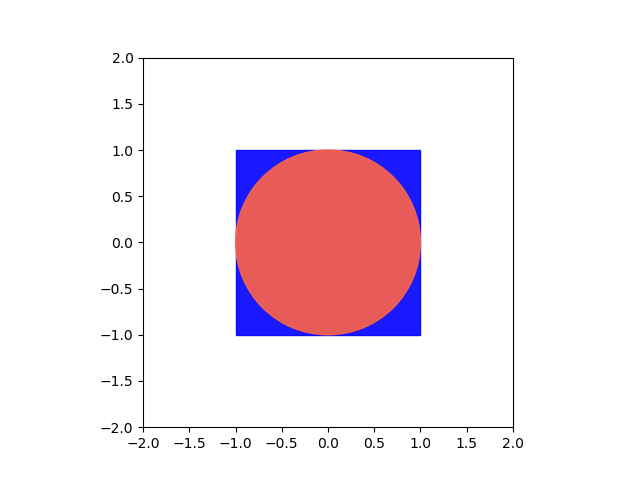

In [46]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.set_xlim(left=-2, right=2)
ax.set_ylim(bottom=-2, top=2)

ax.add_patch(
    patches.Rectangle((-1, -1), 2, 2, color='b', alpha = 0.9)
)

ax.add_patch(
    patches.Circle((0, 0), radius=1, color='tomato', alpha=0.9)
)



We need a function to sample points uniformly from S. We can do this by returning tuples $U = (u_{1}, u_{2})$
where both $u_{1}$ and $u_{2}$ are independent random variables both sampled uniformly from the interval $[-1, 1]$

In [47]:
def sample_square():
    u_1, u_2 = uniform.rvs(loc=-1, scale=2, size=2)
    return tuple([u_1, u_2])


Now let's generate 200 samples from the square S.

In [48]:
samples = np.asarray([sample_square() for _ in range(200)])

The area of S is $4$. The area of C, which is contained in S, is $\pi$. Given U, a random variable sampled uniformly at random from the interior of S, then $P(U \in C) = \frac{\pi}{4}$. <br>Now let $I_{U}$ be the indicator of the event $\{U \in C\}$. Then $EI_{U} = \frac{\pi}{4}$. <br>Now given a sequence $U_{j}$ of random variables sampled independently uniformly at random from the interior of S, we can let $I_{j}$ be the indicator of the event 
$\{U_{j} \in C\}$. Then by the strong law of large numbers, $\frac{1}{n}\sum_{j=1}^{j=n}I_{j} \overset{a.s.}{\to} \frac {\pi}{4}$. 
<br><br>Further, let $X_{n} = \sum_{j=1}^{j=n}I_{j}$. We can use a Chernoff bound to establish estimates telling us about the probability of $X_{n}$ being very close to $E[X_{n}] = \frac{n\pi}{4}$ for a particular value of n.
The Chernoff bound for $X_{n} \sim bin(n, p) $ tells us that $P\{|X_{n} - \frac{n\pi}{4}| \geq \delta\frac{n\pi}{4}\}$
$\leq 2exp(-\frac{n\pi}{12}\delta^{2})$ if $0 < \delta < 1$. <br><br>
Set $\delta = \frac{\sqrt{12}}{\sqrt{\pi}}\frac{\sqrt{n\hspace{0.1cm}log(n)}}{n}$. Then the inequality can be rewritten as $P\{|X_{n} - \frac{n\pi}{4}| \geq C\sqrt{n\hspace{0.1cm}log(n)}\} \leq \frac{2}{n}$, where we have introduced a constant<br><br> $C = \frac{\pi}{4}\bullet\frac{\sqrt{12}}{\sqrt{\pi}}=$ $\frac{\sqrt{3\pi}}{2}$.
We can use this inequality later to make a prediction about how the data generated by a collection of simulations will look and then test this prediction against experiment.
<br><br>
For now, let's look at how one simulation will proceed.


<br>The key intuition (I think) is that if we sample many points from the interior of S, we should be able to use the proportion of points that fell inside of C to approximate $\pi$.<br><br>
By taking large enough n, we should find that $\frac{4}{n}\sum_{j=1}^{j=n}I_{j} \approx \pi$, in the sense that the absolute value of their difference will be small with very high probability.

Now given $U = (u_{1}, u_{2})$ sampled uniformly at random from the interior of S, we have that U belongs to the interior of C if $u^{2}_{1} + u^{2}_{2} \leq 1$. Let's use this to generate the sequence $I_{j}$ from our sequence $U_{j}$ of samples.

In [49]:
indicators = np.apply_along_axis(lambda x: 1 if np.dot(x, x) <= 1 else 0, axis=1, arr=samples)

Now let's move to plot the samples on the square and circle. We can look at the first 50 samples, the first 100 samples, and then all 200 samples.

First, let's separate the samples that fell in the circle from those that didn't.

In [50]:
first_50 = samples[:50]

in_circle_50 = first_50[indicators[:50] == 1]
out_circle_50 = first_50[indicators[:50] == 0]

first_100 = samples[:100]

in_circle_100 = first_100[indicators[:100] == 1]
out_circle_100 = first_100[indicators[:100] == 0]


in_circle_200 = samples[indicators == 1]
out_circle_200 = samples[indicators == 0]


<IPython.core.display.Javascript object>


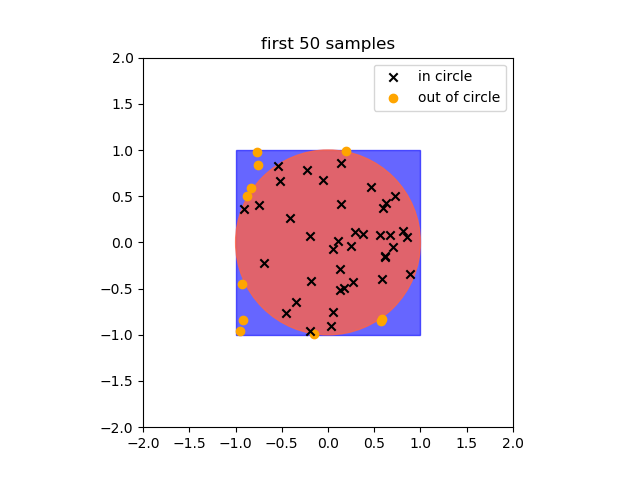

In [51]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1, aspect='equal')
ax1.set_xlim(left=-2, right=2)
ax1.set_ylim(bottom=-2, top=2)
ax1.set_title('first 50 samples')
ax1.add_patch(
    patches.Rectangle((-1, -1), 2, 2, color='b', alpha = 0.6)
)

ax1.add_patch(
    patches.Circle((0, 0), radius=1, color='tomato', alpha=0.8)
)

ax1.scatter(in_circle_50[:, 0], in_circle_50[:, 1], c='black', marker='x', zorder=3, label='in circle')
ax1.scatter(out_circle_50[:, 0], out_circle_50[:, 1], c='orange', marker='o', zorder=2, label='out of circle')

ax1.legend()

<IPython.core.display.Javascript object>


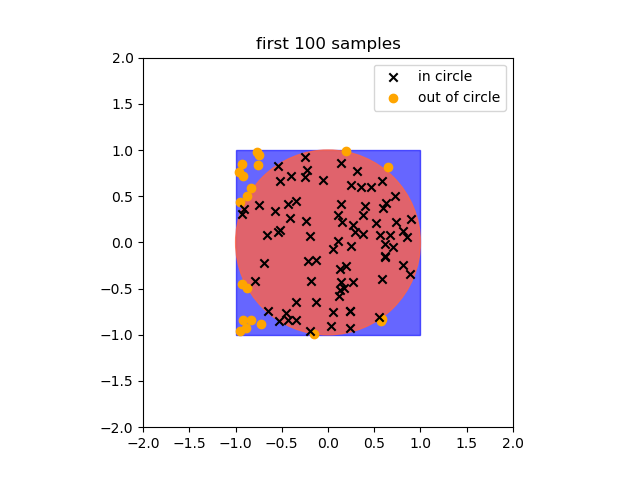

In [53]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1, aspect='equal')
ax1.set_xlim(left=-2, right=2)
ax1.set_ylim(bottom=-2, top=2)
ax1.set_title('first 100 samples')
ax1.add_patch(
    patches.Rectangle((-1, -1), 2, 2, color='b', alpha = 0.6)
)

ax1.add_patch(
    patches.Circle((0, 0), radius=1, color='tomato', alpha=0.8)
)

ax1.scatter(in_circle_100[:, 0], in_circle_100[:, 1], c='black', marker='x', zorder=3, label='in circle')
ax1.scatter(out_circle_100[:, 0], out_circle_100[:, 1], c='orange', marker='o', zorder=2, label='out of circle')

ax1.legend()

<IPython.core.display.Javascript object>


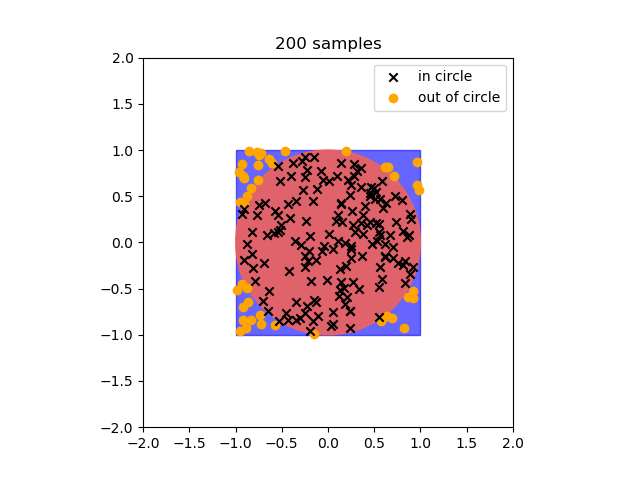

In [54]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1, aspect='equal')
ax1.set_xlim(left=-2, right=2)
ax1.set_ylim(bottom=-2, top=2)
ax1.set_title('200 samples')
ax1.add_patch(
    patches.Rectangle((-1, -1), 2, 2, color='b', alpha = 0.6)
)

ax1.add_patch(
    patches.Circle((0, 0), radius=1, color='tomato', alpha=0.8)
)

ax1.scatter(in_circle_200[:, 0], in_circle_200[:, 1], c='black', marker='x', zorder=3, label='in circle')
ax1.scatter(out_circle_200[:, 0], out_circle_200[:, 1], c='orange', marker='o', zorder=2, label='out of circle')

ax1.legend()

<IPython.core.display.Javascript object>


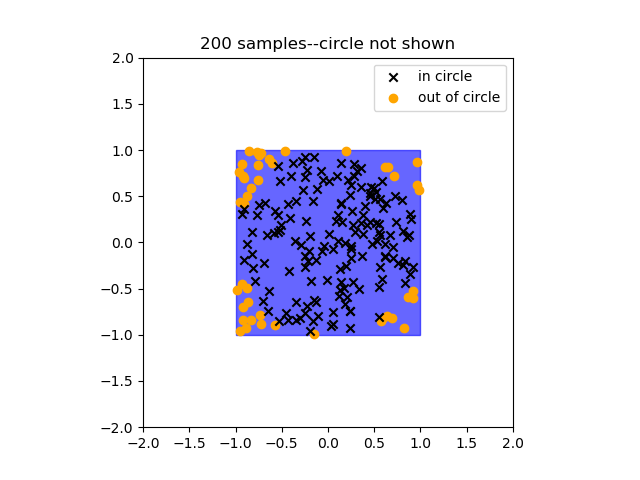

In [55]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1, aspect='equal')
ax1.set_xlim(left=-2, right=2)
ax1.set_ylim(bottom=-2, top=2)
ax1.set_title('200 samples--circle not shown')
ax1.add_patch(
    patches.Rectangle((-1, -1), 2, 2, color='b', alpha = 0.6)
)


ax1.scatter(in_circle_200[:, 0], in_circle_200[:, 1], c='black', marker='x', zorder=3, label='in circle')
ax1.scatter(out_circle_200[:, 0], out_circle_200[:, 1], c='orange', marker='o', zorder=2, label='out of circle')

ax1.legend()

Now let's see whether we are able to get a good approximation to the value of $\pi$ from samples.

In [56]:
weights = np.asarray([4/n for n in range(1, 201)])

In [57]:
means = np.multiply(indicators.cumsum(), weights)

<IPython.core.display.Javascript object>


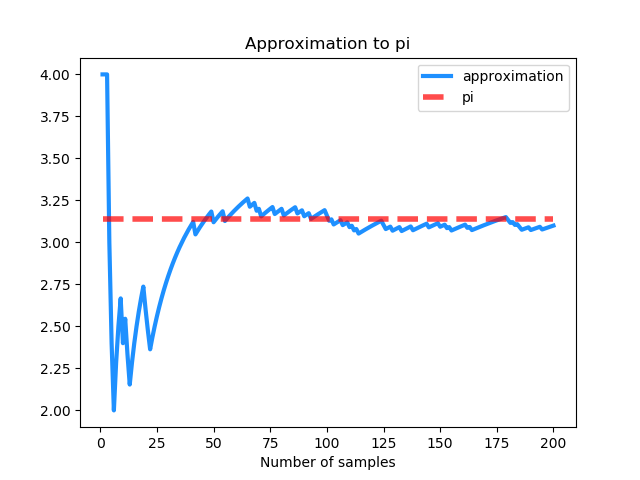

In [58]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Approximation to pi")
ax.plot(range(1, 201), means, color='dodgerblue', lw=3, label='approximation')
ax.plot(range(1, 201), [np.pi]*200, color='red', linestyle='dashed', lw=4, alpha=0.7, label='pi')
ax.legend()
ax.set_xlabel("Number of samples")

We can see the value stabilizing more and more around $\pi$. And this is a basic example of the type of simulation we will run. Let's consider first how to choose the number of samples we want generated per simulation. Let's call this number $n$. Let's set $n = 10^{3}$

Let $Y = \frac{4}{n}X_{n}$. From the Chernoff bounds discussed earlier, multiplying both sides of the inequality inside of the probability by $\frac{4}{n}$ and plugging in $n = 10^{3}$ yields $P\{|Y-\pi| \geq 0.51\}$
$\leq \frac{1}{500}$. In other words, we have that $P\{Y \in [2.63, 3.65]\} \geq \frac{499}{500}$.

Now we can write a function to do a simulation with 1,000 samples and then it will return a boolean indicating if its approximation to $\pi$ fell into the required interval.

In [59]:
def in_interval():
    samples = [sample_square() for _ in range(10**3)]
    indicators = np.apply_along_axis(lambda x: 1 if np.dot(x, x) <= 1 else 0, axis=1, arr=samples)
    approx = 4*indicators.mean()
    if approx > 2.63 and approx < 3.65:
        return True
    else:
        return False

Now let's run in_interval() 5000 times and see what proportion of the times our  approximation landed in the
interval.

In [60]:
simulation_results = [in_interval() for _ in range(5*10**3)]


How many times did the approximation fall in the interval?

In [61]:
simulation_results.count(True)

5000

Based on the Chernoff bound, we expected at most 10 simulations where the approximation fell outside of the interval. In the end, we got zero. Note that the interval we get for $n=1000$ is really quite large. It would be more interesting to increase n to get a very tight interval around $\pi$ and then to do very many simulations with the larger sample number per simulation and inspecting the results. However, running larger simulations was taking a very long time on my computer so I gave it up. Let's just run one last very big simulation.

With $n = 10^{6}$, we have $P\{Y \in [3.127, 3.156]\} \geq 1-\frac{1}{500,000}$.


In [62]:
samples = [sample_square() for _ in range(10**6)]
indicators = np.apply_along_axis(lambda x: 1 if np.dot(x, x) <= 1 else 0, axis=1, arr=samples)
approx = 4*indicators.mean()

In [66]:
print("from a million samples, our approximation to pi is %0.6f" % approx)

from a million samples, our approximation to pi is 3.141628


<IPython.core.display.Javascript object>


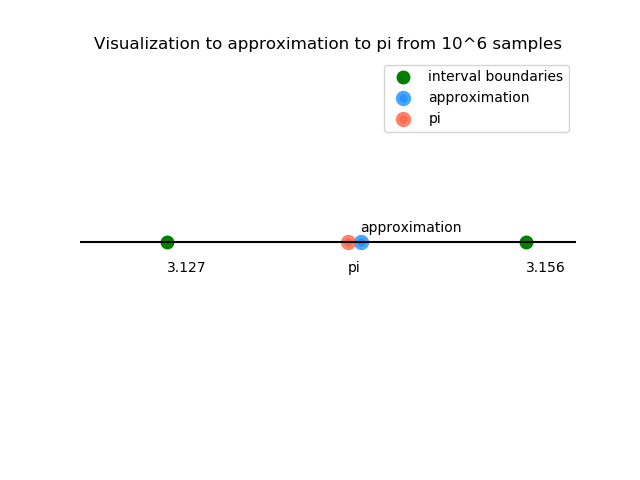

In [121]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(3.12, 3.16)
ax.set_ylim(0,10)
xmin = 1
xmax = 9
y = 5
height = 1
ax.hlines(y, xmin, xmax)
ax.vlines(xmin, y - height / 2., y + height / 2.)
ax.vlines(xmax, y - height / 2., y + height / 2.)
ax.set_title("Visualization to approximation to pi from 10^6 samples")
ax.axis('off')
##small positive number added to approximation to make it more visible on the plot.
ax.scatter([3.127, 3.156], [5]*2, color='green', marker='o', lw=4, label='interval boundaries')
ax.scatter([approx+0.001], [5], color='dodgerblue', marker='o', lw=5, label='approximation', alpha=0.8)
ax.scatter([np.pi], [5], color='tomato', marker='o', lw=5, label='pi', alpha=0.8)

ax.legend()

ax.text(3.127, 4.5, '3.127', verticalalignment='top')
ax.text(3.156, 4.5, '3.156', verticalalignment='top')
ax.text(np.pi, 4.5, 'pi', verticalalignment='top')
ax.text(approx+0.001, 5.2, 'approximation', verticalalignment='bottom')